Binary Classification Project

In [1]:
import pandas as pds

file = ('creditcard_2023.csv')
df =  pds.read_csv(file)

df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Check for null values and duplicate values:

In [2]:
df_null_count = df.isnull().sum()
df_duplicate_count = df.duplicated().sum()
if df_null_count.sum() == 0:
    print("No null values in the dataset")
else:
    print("There are this many null values: " + df_null_count)

if df_duplicate_count == 0:
    print("No duplicate values in the dataset")
else:
    print("There are this many duplicate values: " + df_duplicate_count)

No null values in the dataset
No duplicate values in the dataset


Need to remove features with low variance or no variance because they will not contribute much to the model and could cause overfitting if left in the dataset.

In [3]:
# Calculate the variance of each feature
variances = df.var()

# Sort the features by variance in ascending order
sorted_variances = variances.sort_values()

print(sorted_variances)

Class     2.500004e-01
V7        1.000002e+00
V28       1.000002e+00
V6        1.000002e+00
V26       1.000002e+00
V3        1.000002e+00
V2        1.000002e+00
V18       1.000002e+00
V23       1.000002e+00
V10       1.000002e+00
V25       1.000002e+00
V27       1.000002e+00
V17       1.000002e+00
V21       1.000002e+00
V20       1.000002e+00
V13       1.000002e+00
V9        1.000002e+00
V8        1.000002e+00
V22       1.000002e+00
V24       1.000002e+00
V5        1.000002e+00
V11       1.000002e+00
V19       1.000002e+00
V16       1.000002e+00
V12       1.000002e+00
V14       1.000002e+00
V4        1.000002e+00
V1        1.000002e+00
V15       1.000002e+00
Amount    4.788148e+07
id        2.694505e+10
dtype: float64


All the variances are very similar, so we will use correlation analysis next to remove a column that is tightly correlated with another column.

In [4]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Remove highly correlated features
print(highly_correlated)
highly_correlated.discard('Class')
print(highly_correlated)
df_reduced = df.drop(columns=highly_correlated)
df_reduced = df_reduced.drop(columns='id')
df_reduced

{'V17', 'Class', 'V18'}
{'V17', 'V18'}


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Now two highly correlated columns have been removed to reduce redundancy, which is a 6.4516% decrease in features, along with removing the id variable.

We can also reduce the number of features by removing quasi-constant features, which is a column that has 99% of the same data from column to column.

In [5]:
label_counts = df_reduced['Class'].value_counts()

print(label_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


There are an equal number of Class types of 0 and 1, so there is no need for oversampling or undersampling.

Decision Tree:

Accuracy: 0.9980215605930043


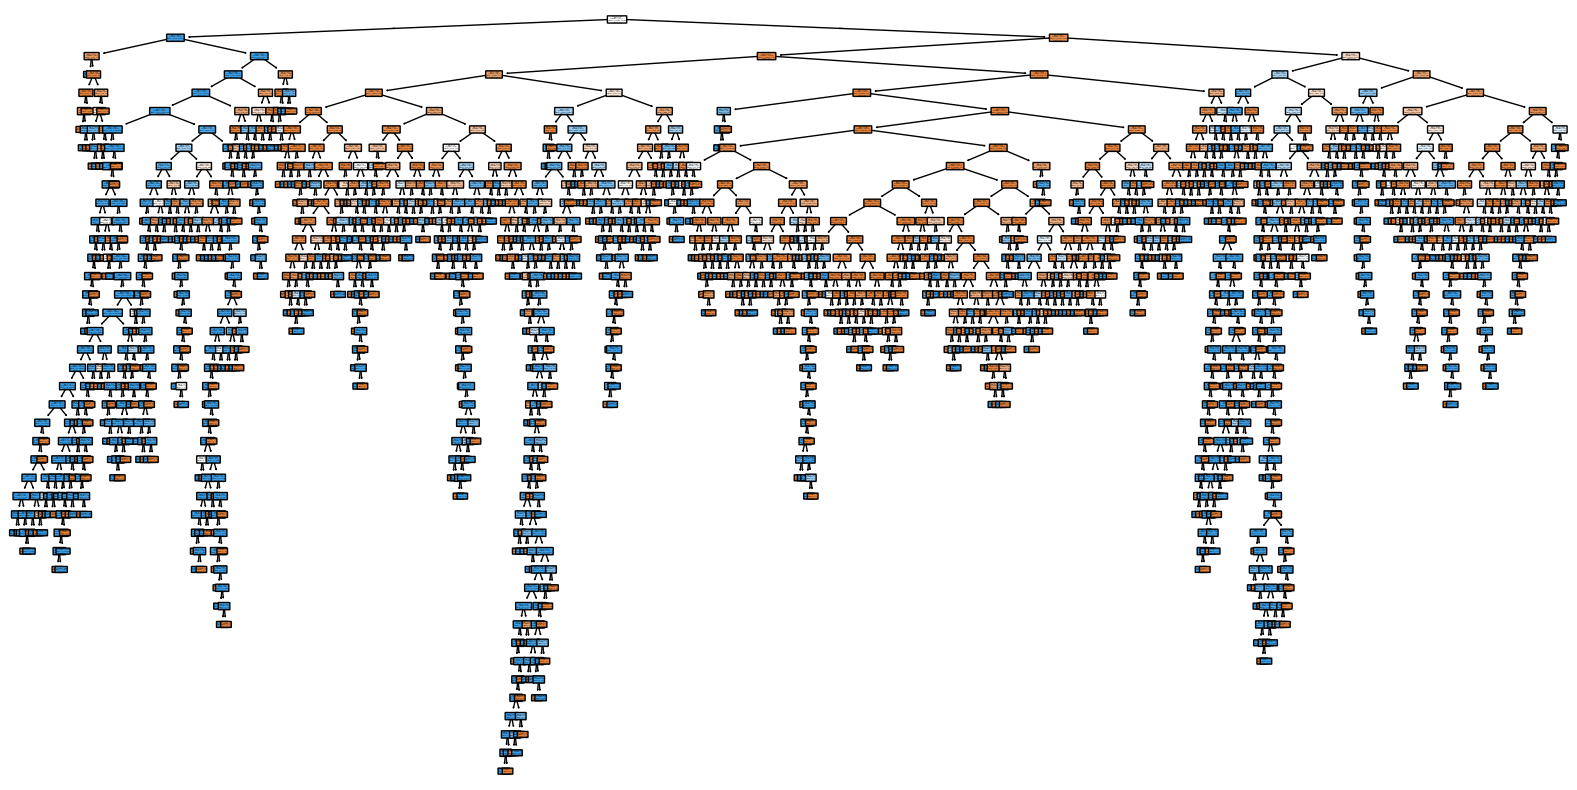

Confusion Matrix:
 [[56582   168]
 [   57 56919]]
True Positives (TP): 56919
False Positives (FP): 168
True Negatives (TN): 56582
False Negatives (FN): 57


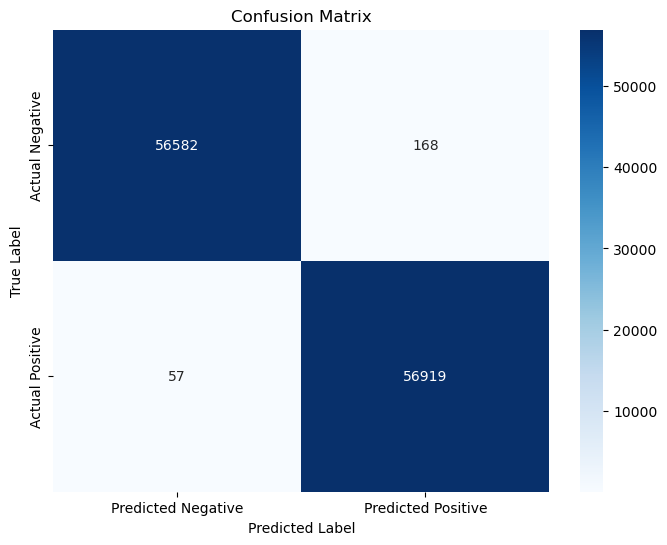

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf =  DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualizr the decision tree
plt.figure(figsize=(20, 10))  # Set figure size for readability
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()


from sklearn.metrics import confusion_matrix, f1_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Optional: Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

k-Nearest Neighbors:

Accuracy: 0.9320999595519055


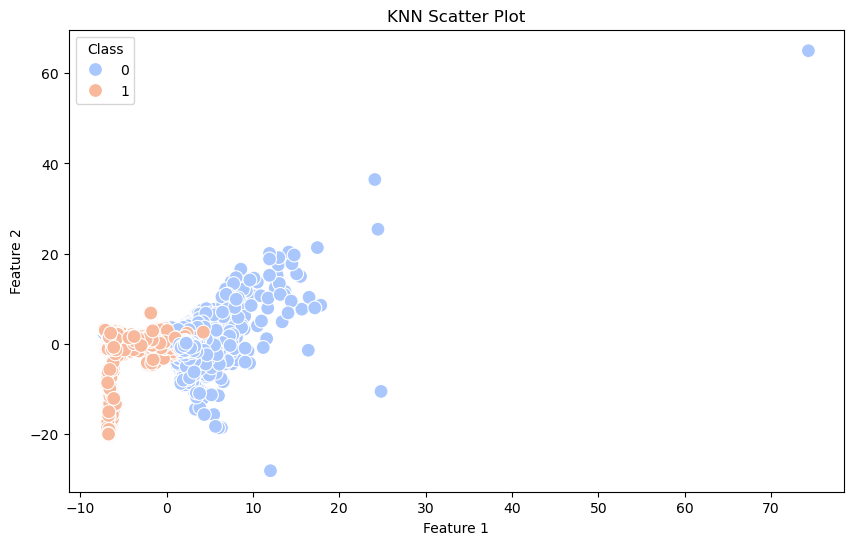

Confusion Matrix:
 [[54365  2385]
 [ 5337 51639]]
True Positives (TP): 51639
False Positives (FP): 2385
True Negatives (TN): 54365
False Negatives (FN): 5337


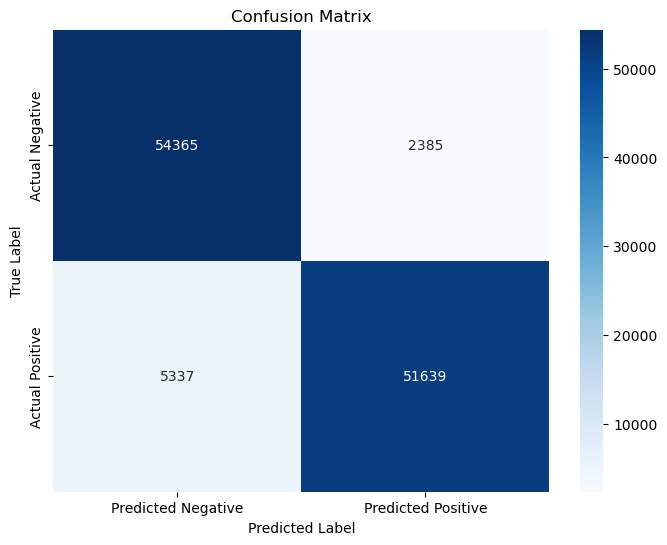

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     56750
           1       0.96      0.91      0.93     56976

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726



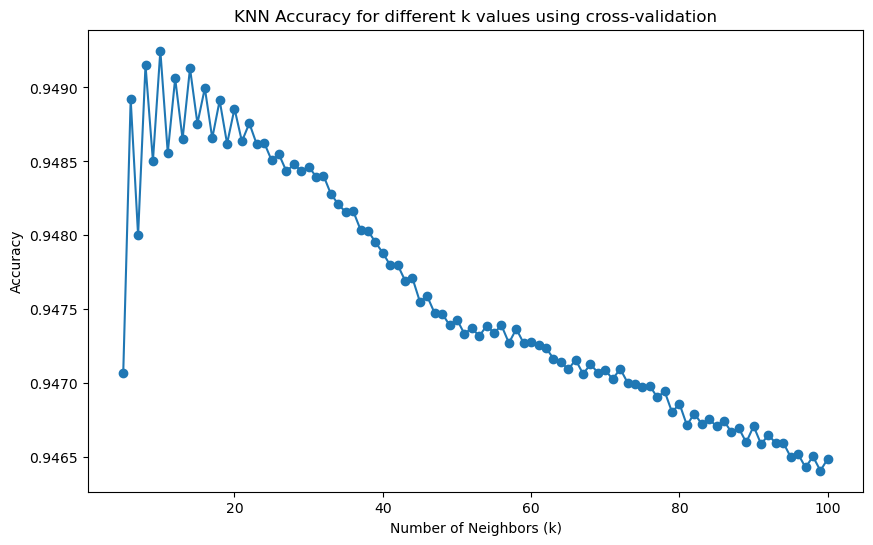

Best k value: 10
Best accuracy: 0.9492486302468622


In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Perform dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.fit_transform(X_test_scaled)

# Create KNN classifier with k=5 but need to find best k
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_reduced, y_train)

# Make predictions
y_pred = knn.predict(X_test_reduced)

# Evaluate the model
accuracy = knn.score(X_test_reduced, y_test)
print("Accuracy:", accuracy)

# Try to make a way to visualize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train, palette='coolwarm', s=100)
plt.title('KNN Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy Plot for different k values using cross-validation
from sklearn.model_selection import cross_val_score
from joblib import Parallel, delayed

k_values = range(5, 101)

def compute_accuracy(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_reduced, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()  # Store the average score across the folds

accuracies = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k) for k in k_values)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker="o")
plt.title("KNN Accuracy for different k values using cross-validation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

max_accuracy = max(accuracies)
index = accuracies.index(max(accuracies))
best_k = k_values[index]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {max_accuracy}")

Gaussian Naïve Bayes:

Accuracy: 0.8990995902432162
F1: 0.8983913840555533
Confusion Matrix:
 [[55817   933]
 [10542 46434]]
True Positives (TP): 46434
False Positives (FP): 933
True Negatives (TN): 55817
False Negatives (FN): 10542


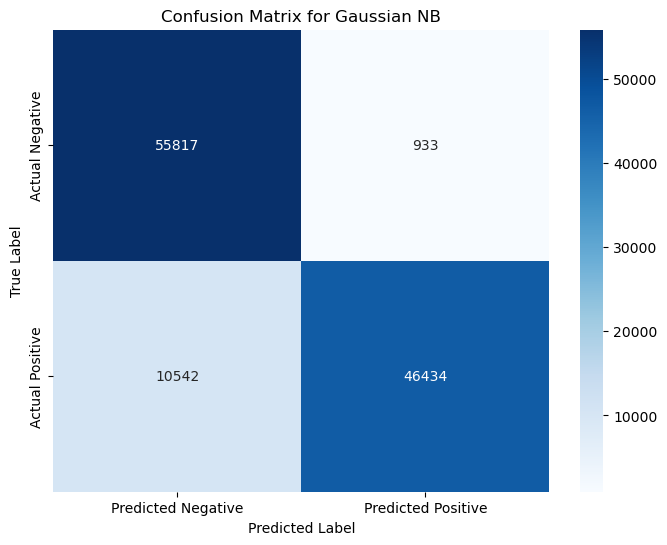

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a gaussian NB classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and f1 measures
accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

# Showcase performance using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gaussian NB")
plt.show()

Logistic Regression: 

Accuracy: 0.961319311327225
F1: 0.9613092438427814
Confusion Matrix:
 [[55526  1224]
 [ 3175 53801]]
True Positives (TP): 53801
False Positives (FP): 1224
True Negatives (TN): 55526
False Negatives (FN): 3175


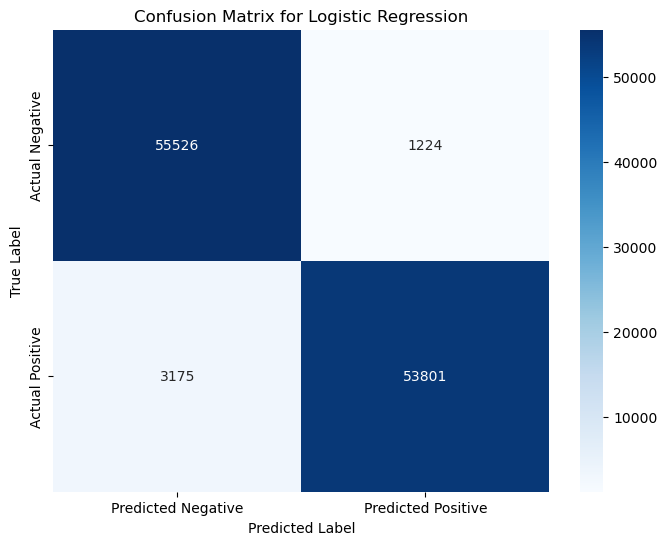

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
clf = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and f1 measures
accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

# Showcase performance using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


Random Forest

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RF classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and f1 measures
from sklearn.metrics import classification_report
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", class_report)

# Showcase performance using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN
if len(conf_matrix) == 2:  # For binary classification
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
else:
    print("For multiclass classification, true positives/negatives are per class.")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Visualize the first tree in the forest
for i in range(1):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    # display(graph)
    # graph.view() for local machine